In [1]:
from pathlib import Path
import pandas as pd

In [2]:
# Directorios
base_dir = Path().resolve()

# Rutas de CSVs
path_csv_dataset = base_dir.parent / "franco" / "data_set_integrado_modelo_final_futuro_binario.csv"

In [3]:
df = pd.read_csv(path_csv_dataset)
df.head()

,id_cotizacion,id_empresa,fecha,precio_apertura,precio_cierre,precio_max,precio_min,volumen_operado,variacion_porcentaje,nombre,...,total_noticias_positivas_std_3d,total_noticias_positivas_media_5d,total_noticias_positivas_std_5d,total_noticias_negativas_media_3d,total_noticias_negativas_std_3d,total_noticias_negativas_media_5d,total_noticias_negativas_std_5d,ratio_sent_positivo_negativo,diff_score_sentimiento,label_t_plus_1
0,901,10,2024-01-02,18.9,18.80,19.30,18.70,66824.55,-1.827676,AAPLD,...,3.464102,1.2,2.683282,3.000000,5.196152,1.8,4.024922,-0.481708,6.8366,NO_SUBE
1,902,10,2024-01-03,19.0,18.80,19.15,18.25,81325.30,0.000000,AAPLD,...,6.000000,3.6,5.366563,6.333333,5.507571,3.8,5.215362,-1.119817,11.1142,SUBE
2,903,10,2024-01-04,18.8,18.95,19.05,18.20,97707.20,0.797872,AAPLD,...,3.785939,4.6,4.979960,9.000000,1.000000,5.4,4.979960,-0.408107,6.7009,NO_SUBE
3,904,10,2024-01-05,19.0,18.80,19.25,18.60,201923.66,-0.791557,AAPLD,...,3.785939,5.8,4.266146,9.000000,1.000000,7.2,4.086563,-0.799964,7.9571,SUBE
4,905,10,2024-01-08,19.1,19.35,19.50,18.85,151354.09,2.925532,AAPLD,...,1.527525,7.4,2.792848,10.666667,3.785939,10.2,2.774887,-0.690825,12.1479,NO_SUBE


In [4]:
df_apple = df[df['nombre'] == 'AAPLD']
df_apple.head()

,id_cotizacion,id_empresa,fecha,precio_apertura,precio_cierre,precio_max,precio_min,volumen_operado,variacion_porcentaje,nombre,...,total_noticias_positivas_std_3d,total_noticias_positivas_media_5d,total_noticias_positivas_std_5d,total_noticias_negativas_media_3d,total_noticias_negativas_std_3d,total_noticias_negativas_media_5d,total_noticias_negativas_std_5d,ratio_sent_positivo_negativo,diff_score_sentimiento,label_t_plus_1
0,901,10,2024-01-02,18.9,18.80,19.30,18.70,66824.55,-1.827676,AAPLD,...,3.464102,1.2,2.683282,3.000000,5.196152,1.8,4.024922,-0.481708,6.8366,NO_SUBE
1,902,10,2024-01-03,19.0,18.80,19.15,18.25,81325.30,0.000000,AAPLD,...,6.000000,3.6,5.366563,6.333333,5.507571,3.8,5.215362,-1.119817,11.1142,SUBE
2,903,10,2024-01-04,18.8,18.95,19.05,18.20,97707.20,0.797872,AAPLD,...,3.785939,4.6,4.979960,9.000000,1.000000,5.4,4.979960,-0.408107,6.7009,NO_SUBE
3,904,10,2024-01-05,19.0,18.80,19.25,18.60,201923.66,-0.791557,AAPLD,...,3.785939,5.8,4.266146,9.000000,1.000000,7.2,4.086563,-0.799964,7.9571,SUBE
4,905,10,2024-01-08,19.1,19.35,19.50,18.85,151354.09,2.925532,AAPLD,...,1.527525,7.4,2.792848,10.666667,3.785939,10.2,2.774887,-0.690825,12.1479,NO_SUBE


In [5]:
df_apple['fecha'] = pd.to_datetime(df_apple['fecha'])

C:\Users\opera\AppData\Local\Temp\ipykernel_31652\389791841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apple['fecha'] = pd.to_datetime(df_apple['fecha'])


In [6]:
# Establecer fecha como índice
df_apple = df_apple.set_index('fecha')

In [7]:
# Crear un rango diario completo desde la fecha mínima a la máxima
rango_fechas = pd.date_range(start=df_apple.index.min(), end=df_apple.index.max(), freq='D')

In [8]:
# Reindexar el DataFrame al nuevo rango
df_apple = df_apple.reindex(rango_fechas)

In [9]:
# Rellenar valores faltantes hacia adelante (último valor conocido)
df_apple = df_apple.ffill()

In [10]:
# Restaurar la columna 'fecha'
df_apple = df_apple.reset_index().rename(columns={'index': 'fecha'})

In [11]:
df_apple['valoracion_llm'] = df_apple['valoracion_llm'].map({
    'positivo': 1,
    'neutro': 0,
    'negativo': -1
})

In [12]:
# Obtenemos train/test
import math
numero_separador = math.trunc(len(df_apple) * 0.9)

train_auto = df_apple[0:numero_separador]
test_auto = df_apple[numero_separador:]

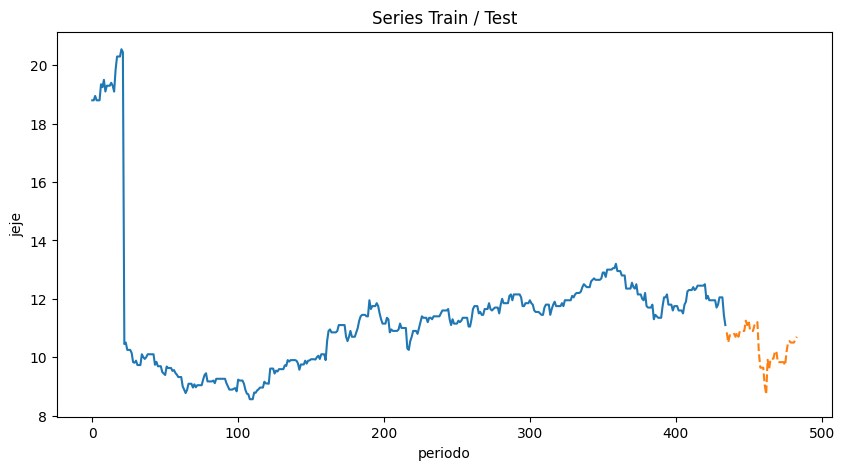

In [13]:
import matplotlib.pyplot as plt

# Observamos la serie según la columna variación de la recaudación (mensual)
plt.figure(figsize=(10, 5))

plt.plot(train_auto.index, train_auto['precio_cierre'], label='Train')
plt.plot(test_auto.index, test_auto['precio_cierre'], label='Test', linestyle='--')

plt.title('Series Train / Test')
plt.xlabel('periodo')
plt.ylabel('jeje')

plt.show()

In [14]:
from autots import AutoTS

model_fast = AutoTS(
    forecast_length=len(test_auto),
    frequency='D',
    prediction_interval=0.9,
    ensemble=None,
    models_mode='deep',
    model_list = 'fast'  ,
    max_generations=10,   # intenta optimizar el modelo a traves de 10 iteraciones de ajuste.
    num_validations=3,
    no_negatives=True,
    n_jobs='auto'
)

Using 3 cpus for n_jobs.


In [15]:
regresores = [
    'precio_apertura', 'volumen_operado',
    'total_noticias_negativas', 'suma_score_sentimiento_negativas',
    'total_noticias_positivas', 'suma_score_sentimiento_positivas',
    'valoracion_llm',
    'suma_score_sentimiento_positivas_lag_1', 'suma_score_sentimiento_positivas_lag_2', 'suma_score_sentimiento_positivas_lag_3',
    'suma_score_sentimiento_negativas_lag_1', 'suma_score_sentimiento_negativas_lag_2', 'suma_score_sentimiento_negativas_lag_3',
    'total_noticias_positivas_lag_1', 'total_noticias_positivas_lag_2', 'total_noticias_positivas_lag_3',
    'total_noticias_negativas_lag_1', 'total_noticias_negativas_lag_2', 'total_noticias_negativas_lag_3',
    'variacion_porcentaje_media_3d', 'variacion_porcentaje_std_3d',
    'variacion_porcentaje_media_5d', 'variacion_porcentaje_std_5d',
    'volumen_operado_media_3d', 'volumen_operado_std_3d',
    'volumen_operado_media_5d', 'volumen_operado_std_5d'
]

In [16]:
# Realizamos entrenamiento / predicción y mostramos el mejor modelo para cada tipo
model_fast = model_fast.fit(
    train_auto,
    date_col='fecha',
    value_col='precio_cierre',
    id_col=None,
    future_regressor=train_auto[regresores]
)

Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model LastValueNaive in generation 0 of 10
Model Number: 15 with model LastValueNaive in generation 0 of 10
Model Number: 16 with model LastValueNaive in generation 0 of 10
Model Number: 17 with model LastValueNaive in generation 0 of 10
Model Number: 18 with model SeasonalNaive in generation 0 of 10
Model Number: 19 with model SeasonalNaive in generation 0 of 10
Model Number: 20 with model SeasonalNaive in generation 0 of 10
Model Number: 21 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 27 with model DatepartRegression in generation 0 of 10
Model Number: 28 with model SeasonalNaive in generation 0 of 10
Model Number: 29 with model DatepartRegression in generation 0 of 10
Model Number: 30 with model ETS in generation 0 of 10
Model Number: 31 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Model Number: 32 with model UnivariateMotif in generation 0 of 10
Model Number: 33 with model UnivariateMotif in generation 0 of 10
Model Number: 34 with model SectionalMotif in generation 0 of 10
Model Number: 35 with model SectionalMotif in generation 0 of 10
Model Number: 36 with model SeasonalNaive in generation 0 of 10
Model Number: 37 with model DatepartRegression in generation 0 of 10
Model Number: 38 with model NVAR in generation 0 of 10
Model Number: 39 with model Cassandra in generation 0 of 10
Model Number: 40 with model SeasonalityMotif in generation 0 of 10
Model Number

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcast

Model Number: 44 with model NVAR in generation 0 of 10
Model Number: 45 with model BallTreeMultivariateMotif in generation 0 of 10
Model Number: 46 with model SectionalMotif in generation 0 of 10
Model Number: 47 with model FFT in generation 0 of 10
Model Number: 48 with model BasicLinearModel in generation 0 of 10
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 386 is different from 1651)') in model 48 in generation 0: BasicLinearModel
Model Number: 49 with model BasicLinearModel in generation 0 of 10
Model Number: 50 with model SeasonalityMotif in generation 0 of 10
Model Number: 51 with model BasicLinearModel in generation 0 of 10
Model Number: 52 with model ConstantNaive in generation 0 of 10
Model Number: 53 with model LastValueNaive in generation 0 of 10
Model Number: 54 with model AverageValueNaive in generation 0 of 10
2025-01-22 00:00:00
2025-01-22 00:00:00
2025-01-22 00:00:00
T

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 61 in generation 0: WindowRegression
Model Number: 62 with model DatepartRegression in generation 0 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'simple_

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 66 with model MAR in generation 0 of 10
Template Eval Error: ValueError('Shape of passed values is (42, 2), indices imply (49, 2)') in model 66 in generation 0: MAR
Model Number: 67 with model RRVAR in generation 0 of 10
Model Number: 68 with model KalmanStateSpace in generation 0 of 10
Model Number: 69 with model MetricMotif in generation 0 of 10
Template Eval Error: ValueError('Shape of passed values is (49, 2), indices imply (49, 1)') in model 69 in generation 0: MetricMotif
Model Number: 70 with model Cassandra in generation 0 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 71 with model SeasonalityMotif in generation 0 of 10
Model Number: 72 with model FFT in generation 0 of 10
Model Number: 73 with model BallTreeMultivariateMotif in generation 0 of 10
Model Number: 74 with model BasicLinearModel in generation 0 of 10
Model Number: 75 with model SeasonalityMotif in generation 0 of 10
Model Number: 76 with model AverageValueNaive in generation 0 of 10
Model Number: 77 with model SeasonalNaive in generation 0 of 10
Model Number: 78 with model RRVAR in generation 0 of 10
Model Number: 79 with model SeasonalityMotif in generation 0 of 10
Model Number: 80 with model ETS in generation 0 of 10
Model Number: 81 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 81 in generation 0: VECM
Model Number: 82 with model ConstantNaive in generation 0 of 10
Model Number: 83 with model ConstantNaive in generation 0 of 10
Model Number: 84 with model SeasonalNaive in generation 0 of 10
Model Number:

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Template Eval Error: ValueError('Input X contains NaN.\nLinearSVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 104 in generation 0: WindowRegression
Model Number: 105 with model Cassandra in generation 0 of 10
Model Number: 106 with model ETS in generation 0 of 10
Model Number: 107 with model SectionalMotif in generation 0 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76679e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 108 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError('Input X contains NaN.\nAdaBoostRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 108 in generation 0: DatepartRegression
Model Number: 109 with model ConstantNaive in generation 0 of 10
Model Number: 110 with model ConstantNaive in generation 0 of 10
Model Number: 111 with model DatepartRegression in generation 0 of 10
Templ

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:898: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl

Model Number: 125 with model SectionalMotif in generation 0 of 10
Model Number: 126 with model MetricMotif in generation 0 of 10
Model Number: 127 with model AverageValueNaive in generation 0 of 10
Model Number: 128 with model ConstantNaive in generation 0 of 10
2025-01-22 00:00:00
2025-01-22 00:00:00
2025-01-22 00:00:00
Model Number: 129 with model LastValueNaive in generation 0 of 10
Model Number: 130 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all est

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 142 with model WindowRegression in generation 0 of 10
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {'decimals': 1, 'on_transform': False, 'on_inverse': True}, '1': {'window_size': 30, 'alpha': 2.0, 'grouping_forward_limit': 2, 'max_level_shifts': 30, 'alignment': 'average'}, '2': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 300, 'center': True}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False, 'on_inverse': False}, '3': {'numtaps': 7, 'cutoff_hz': 20, 'window': 'hann', 'sampling_frequency': 2, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '4': {'fixed': True, 'window': 3, 'macro_micro': False, 'center': True}, '5': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.25, 0.75]}, 'transform_dict': None, 'reverse_a

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.45407e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 154 with model GLM in generation 0 of 10
Model Number: 155 with model SeasonalityMotif in generation 0 of 10
Model Number: 156 with model MetricMotif in generation 0 of 10
Model Number: 157 with model SeasonalityMotif in generation 0 of 10
Model Number: 158 with model VAR in generation 0 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Template Eval Error: ValueError('Only gave one variable to VAR') in model 158 in generation 0: VAR
Model Number: 159 with model SeasonalityMotif in generation 0 of 10
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 159 in generation 0: SeasonalityMotif
Model Number: 160 with model SeasonalityMotif in generation 0 of 10
Model Number: 161 with model UnivariateMotif in generation 0 of 10
Model Number: 162 with model UnivariateMotif in generation 0 of 10
Model Number: 163 with model AverageValueNaive in generation 0 of 10
Model Number: 164 with model Cassandra in generation 0 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning 

Model Number: 165 with model BasicLinearModel in generation 0 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 165 in generation 0: BasicLinearModel
Model Number: 166 with model BasicLinearModel in generation 0 of 10
New Generation: 1 of 10
Model Number: 167 with model UnivariateMotif in generation 1 of 10
Model Number: 168 with model LastValueNaive in generation 1 of 10
Model Number: 169 with model SeasonalityMotif in generation 1 of 10
Model Number: 170 with model SeasonalityMotif in generation 1 of 10
Model Number: 171 with model NVAR in generation 1 of 10
Model Number: 172 with model ETS in generation 1 of 10
Model Number: 173 with model LastValueNaive in generation 1 of 10
Model Number: 174 with model ConstantNaive in generation 1 of 10
Model Number: 175 with model GLS in generation 1 of 10
Model Number: 176 with model SectionalMotif in generation 1 of 10
Model Number: 177 with model UnivariateMotif in generation 1 of 10
Model Number: 178 with model Sectiona

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 180 with model Cassandra in generation 1 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 180 in generation 1: Cassandra
Model Number: 181 with model SeasonalityMotif in generation 1 of 10
Model Number: 182 with model SeasonalityMotif in generation 1 of 10
Model Number: 183 with model SeasonalNaive in generation 1 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\models\matrix_var.py:379: RuntimeWarning: invalid value encountered in scalar divide
  alpha = rold / np.inner(q, Aq)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76679e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 184 with model SectionalMotif in generation 1 of 10
Model Number: 185 with model MetricMotif in generation 1 of 10
Model Number: 186 with model DatepartRegression in generation 1 of 10
Model Number: 187 with model SectionalMotif in generation 1 of 10
Model Number: 188 with model SeasonalNaive in generation 1 of 10
Model Number: 189 with model BallTreeMultivariateMotif in generation 1 of 10
Model Number: 190 with model ETS in generation 1 of 10
Model Number: 191 with model UnivariateMotif in generation 1 of 10
Model Number: 192 with model NVAR in generation 1 of 10
Model Number: 193 with model GLS in generation 1 of 10
Model Number: 194 with model BallTreeMultivariateMotif in generation 1 of 10
Model Number: 195 with model GLS in generation 1 of 10
Model Number: 196 with model ETS in generation 1 of 10
Model Number: 197 with model AverageValueNaive in generation 1 of 10
Model Number: 198 with model DatepartRegression in generation 1 of 10
Model Number: 199 with model ETS i

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 213 with model SectionalMotif in generation 1 of 10
Model Number: 214 with model SectionalMotif in generation 1 of 10
Model Number: 215 with model NVAR in generation 1 of 10
Model Number: 216 with model LastValueNaive in generation 1 of 10
Model Number: 217 with model SeasonalNaive in generation 1 of 10
Model Number: 218 with model Cassandra in generation 1 of 10
Model Number: 219 with model MetricMotif in generation 1 of 10
Model Number: 220 with model Cassandra in generation 1 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 3}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '3': {}, '4': {'method': 100}} with error ValueError('BTCD only works on multivarate series')") in model 220 in generation 1: Cassandra
Model Number: 221 with model Constan

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\models\basics.py:958: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecasts = pd.concat([forecasts, empty_frame], axis=0, sort=False).ffill()
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\models\basics.py:972: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the r

Model Number: 222 with model SeasonalNaive in generation 1 of 10
Model Number: 223 with model SeasonalityMotif in generation 1 of 10
Model Number: 224 with model AverageValueNaive in generation 1 of 10
Model Number: 225 with model LastValueNaive in generation 1 of 10
Model Number: 226 with model ETS in generation 1 of 10
Model Number: 227 with model LastValueNaive in generation 1 of 10
Model Number: 228 with model SectionalMotif in generation 1 of 10
Model Number: 229 with model SectionalMotif in generation 1 of 10
Model Number: 230 with model AverageValueNaive in generation 1 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76679e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 231 with model Cassandra in generation 1 of 10
Model Number: 232 with model LastValueNaive in generation 1 of 10
Model Number: 233 with model AverageValueNaive in generation 1 of 10
Model Number: 234 with model WindowRegression in generation 1 of 10
Model Number: 235 with model GLS in generation 1 of 10
Model Number: 236 with model UnivariateMotif in generation 1 of 10
Model Number: 237 with model ConstantNaive in generation 1 of 10
Model Number: 238 with model BasicLinearModel in generation 1 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76679e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 239 with model SeasonalityMotif in generation 1 of 10
Model Number: 240 with model ConstantNaive in generation 1 of 10
Model Number: 241 with model DatepartRegression in generation 1 of 10
Model Number: 242 with model AverageValueNaive in generation 1 of 10
Model Number: 243 with model GLM in generation 1 of 10
Model Number: 244 with model ETS in generation 1 of 10
Model Number: 245 with model DatepartRegression in generation 1 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 246 with model SeasonalityMotif in generation 1 of 10
Model Number: 247 with model SectionalMotif in generation 1 of 10
Model Number: 248 with model GLM in generation 1 of 10
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 772 and the array at index 1 has size 386') in model 248 in generation 1: GLM
Model Number: 249 with model GLS in generation 1 of 10
Model Number: 250 with model SeasonalityMotif in generation 1 of 10
Model Number: 251 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit from params ffill {\'0\': {\'method\': \'clip\', \'std_threshold\': 1, \'fillna\': None}, \'1\': {\'theta_values\': [0, 2]}, \'2\': {\'threshold\': 0.8, \'splash_threshold\': None, \'use_dayofmonth_holidays\': True, \'use_wkdom_holidays\': True, \'use_wkdeom_holidays\': False, \'use_lunar_holid

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\models\basics.py:958: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat ope

Model Number: 257 with model ETS in generation 1 of 10
Model Number: 258 with model MetricMotif in generation 1 of 10
Model Number: 259 with model RRVAR in generation 1 of 10
Model Number: 260 with model AverageValueNaive in generation 1 of 10
Model Number: 261 with model Cassandra in generation 1 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 262 with model MetricMotif in generation 1 of 10
Model Number: 263 with model ETS in generation 1 of 10
Model Number: 264 with model UnivariateMotif in generation 1 of 10
Model Number: 265 with model ConstantNaive in generation 1 of 10
Model Number: 266 with model ConstantNaive in generation 1 of 10
Model Number: 267 with model SeasonalityMotif in generation 1 of 10
Model Number: 268 with model WindowRegression in generation 1 of 10
Model Number: 269 with model LastValueNaive in generation 1 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 270 with model BasicLinearModel in generation 1 of 10
Model Number: 271 with model AverageValueNaive in generation 1 of 10
Model Number: 272 with model SeasonalNaive in generation 1 of 10
Model Number: 273 with model DatepartRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 273 in generation 1: DatepartRegression
Model Number: 274 with model DatepartRegression in generation 1 of 10
Model Number: 275 with model DatepartRegression in generation 1 of 10
Model Number: 276 with model SeasonalNaive in generation 1 of 10
Model Number: 277 with model BasicLinearModel in generation 1 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 277 in generation 1: BasicLinearModel
Model Number: 278 with model AverageValueNaive in generation 1 of 10
Model Number: 279 with model MetricMotif in generation 1 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on f

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 290 with model ConstantNaive in generation 2 of 10
Model Number: 291 with model DatepartRegression in generation 2 of 10
Model Number: 292 with model SectionalMotif in generation 2 of 10
Model Number: 293 with model LastValueNaive in generation 2 of 10
Model Number: 294 with model DatepartRegression in generation 2 of 10
Model Number: 295 with model MetricMotif in generation 2 of 10
Model Number: 296 with model SeasonalityMotif in generation 2 of 10
Model Number: 297 with model SeasonalityMotif in generation 2 of 10
Model Number: 298 with model AverageValueNaive in generation 2 of 10
Model Number: 299 with model AverageValueNaive in generation 2 of 10
Model Number: 300 with model MetricMotif in generation 2 of 10
Model Number: 301 with model ConstantNaive in generation 2 of 10
Model Number: 302 with model Cassandra in generation 2 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 303 with model DatepartRegression in generation 2 of 10
Model Number: 304 with model ETS in generation 2 of 10
Model Number: 305 with model RRVAR in generation 2 of 10
Model Number: 306 with model UnivariateMotif in generation 2 of 10
Model Number: 307 with model Cassandra in generation 2 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 307 in generation 2: Cassandra
Model Number: 308 with model UnivariateMotif in generation 2 of 10
Model Number: 309 with model ConstantNaive in generation 2 of 10
Model Number: 310 with model BallTreeMultivariateMotif in generation 2 of 10
Model Number: 311 with model GLS in generation 2 of 10
Model Number: 312 with model SeasonalityMotif in generation 2 of 10
Model Number: 313 with model UnivariateMotif in generation 2 of 10
Model Number: 314 with model SeasonalityMotif in generation 2 of 10
Model Number: 315 with model SectionalMotif in generation 2 of 10
Model Number: 316 with model SectionalMotif in generation 2 of 10

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 318 with model BallTreeMultivariateMotif in generation 2 of 10
Model Number: 319 with model SeasonalNaive in generation 2 of 10
Model Number: 320 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer PCA failed on fit from params zero {\'0\': {\'whiten\': True, \'n_components\': 100}, \'1\': {\'method\': \'savgol_filter\', \'method_args\': {\'window_length\': 31, \'polyorder\': 4, \'deriv\': 0, \'mode\': \'nearest\'}}, \'2\': {}} with error ValueError("n_components=100 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 320 in generation 2: LastValueNaive
Model Number: 321 with model SeasonalNaive in generation 2 of 10
Model Number: 322 with model SeasonalNaive in generation 2 of 10
Model Number: 323 with model Cassandra in generation 2 of 10
Model Number: 324 with model AverageValueNaive in generation 2 of 10
Model Number: 325 with model MetricMotif in generation 2 of 10
Template Eval E

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 345 with model DatepartRegression in generation 2 of 10
Model Number: 346 with model ETS in generation 2 of 10
Model Number: 347 with model ConstantNaive in generation 2 of 10
Template Eval Error: Exception("Transformer PowerTransformer failed on fit from params rolling_mean_24 {'0': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}, '2': {}, '3': {'lag_1': 12, 'method': 'LastValue'}, '4': {'method': 'IQR', 'method_params': {'iqr_threshold': 4.2, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': Fals

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\linalg\_linalg.py:2236: RuntimeWarning: overflow encountered in divide
  s = divide(1, s, where=large, out=s)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\linalg\_linalg.py:3383: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\models\matrix_var.py:30: RuntimeWarning: invalid value encountered in matmul
  W = X2 @ np.linalg.pinv((V @ X1))


Model Number: 354 with model GLM in generation 2 of 10
Model Number: 355 with model LastValueNaive in generation 2 of 10
Model Number: 356 with model KalmanStateSpace in generation 2 of 10
Model Number: 357 with model LastValueNaive in generation 2 of 10
Model Number: 358 with model LastValueNaive in generation 2 of 10
Model Number: 359 with model SeasonalNaive in generation 2 of 10
Model Number: 360 with model SeasonalityMotif in generation 2 of 10
Model Number: 361 with model SeasonalityMotif in generation 2 of 10
Model Number: 362 with model UnivariateMotif in generation 2 of 10
Model Number: 363 with model LastValueNaive in generation 2 of 10
Model Number: 364 with model ETS in generation 2 of 10
Model Number: 365 with model MetricMotif in generation 2 of 10
Model Number: 366 with model ETS in generation 2 of 10
Model Number: 367 with model MetricMotif in generation 2 of 10
Model Number: 368 with model SectionalMotif in generation 2 of 10
Model Number: 369 with model BallTreeMultiv

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 372 with model UnivariateMotif in generation 2 of 10
Model Number: 373 with model UnivariateMotif in generation 2 of 10
Model Number: 374 with model MetricMotif in generation 2 of 10
Model Number: 375 with model SectionalMotif in generation 2 of 10
Model Number: 376 with model SectionalMotif in generation 2 of 10
Model Number: 377 with model NVAR in generation 2 of 10
Model Number: 378 with model GLS in generation 2 of 10
Model Number: 379 with model SectionalMotif in generation 2 of 10
Model Number: 380 with model Cassandra in generation 2 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError("nan values in predict_x_array in columns ['regr_precio_apertura', 'regr_volumen_operado', 'regr_total_noticias_negativas', 'regr_suma_score_sentimiento_negativas', 'regr_total_noticias_positivas']") in model 380 in generation 2: Cassandra
Model Number: 381 with model ConstantNaive in generation 2 of 10
Model Number: 382 with model MetricMotif in generation 2 of 10
Model Number: 383 with model BasicLinearModel in generation 2 of 10
Model Number: 384 with model ConstantNaive in generation 2 of 10
Model Number: 385 with model ConstantNaive in generation 2 of 10
Model Number: 386 with model DatepartRegression in generation 2 of 10
Model Number: 387 with model SeasonalityMotif in generation 2 of 10
Model Number: 388 with model NVAR in generation 2 of 10
Model Number: 389 with model ETS in generation 2 of 10
Model Number: 390 with model LastValueNaive in generation 2 of 10
Model Number: 391 with model AverageValueNaive in generation 2 of 10
Model Number: 392 

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76679e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 393 with model NVAR in generation 2 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {}, '2': {'method': 0.9}, '3': {'constraint_method': 'quantile', 'constraint_direction': 'lower', 'constraint_regularization': 1.0, 'constraint_value': 0.01, 'bounds_only': False, 'fillna': None}, '4': {'det_order': 0, 'k_ar_diff': 2}} with error ValueError('Coint only works on multivarate series')") in model 393 in generation 2: NVAR
Model Number: 394 with model UnivariateMotif in generation 2 of 10
Model Number: 395 with model BallTreeMultivariateMotif in generation 2 of 10
Model Number: 396 with model DatepartRegression in generation 2 of 10
Template Eval Error: XGBoostError('[10:11:37] C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/data/data.cc:452: Check failed: this->la

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 401 with model SectionalMotif in generation 3 of 10
Model Number: 402 with model UnivariateMotif in generation 3 of 10
Model Number: 403 with model AverageValueNaive in generation 3 of 10
Model Number: 404 with model NVAR in generation 3 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'window_size': 30, 'alpha': 1.0, 'grouping_forward_limit': 6, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '2': {'method': 0.9}} with error ValueError('BTCD only works on multivarate series')") in model 404 in generation 3: NVAR
Model Number: 405 with model GLS in generation 3 of 10
Model Number: 406 with model GLM in generation 3 of 10
Model Number: 407 with model SeasonalityMotif in generation 3 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 408 with model MetricMotif in generation 3 of 10
Model Number: 409 with model SeasonalityMotif in generation 3 of 10
Model Number: 410 with model MetricMotif in generation 3 of 10
Model Number: 411 with model GLM in generation 3 of 10
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 411 in generation 3: GLM
Model Number: 412 with model UnivariateMotif in generation 3 of 10
Model Number: 413 with model SeasonalNaive in generation 3 of 10
Model Number: 414 with model BallTreeMultivariateMotif in generation 3 of 10
Model Number: 415 with model BallTreeMultivariateMotif in generation 3 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: overflow encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmode

Model Number: 416 with model SeasonalityMotif in generation 3 of 10
Model Number: 417 with model BallTreeMultivariateMotif in generation 3 of 10
Model Number: 418 with model ConstantNaive in generation 3 of 10
Model Number: 419 with model ETS in generation 3 of 10
Model Number: 420 with model BallTreeMultivariateMotif in generation 3 of 10
Model Number: 421 with model UnivariateMotif in generation 3 of 10
Model Number: 422 with model BallTreeMultivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'method\': \'clip\', \'std_threshold\': 1, \'fillna\': None}, \'1\': {\'lag\': 1, \'fill\': \'bfill\'}, \'2\': {\'window\': 364}, \'3\': {\'model\': \'Poisson\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 520, \'datepart_method\': None}, \'4\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.7, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'m

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\models\basics.py:3647: RuntimeWarning: invalid value encountered in sqrt
  self.sigma = np.sqrt(sse / (n - p))


Model Number: 428 with model NVAR in generation 3 of 10
Model Number: 429 with model SeasonalityMotif in generation 3 of 10
Model Number: 430 with model MetricMotif in generation 3 of 10
Model Number: 431 with model ETS in generation 3 of 10
Model Number: 432 with model Cassandra in generation 3 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 433 with model SectionalMotif in generation 3 of 10
Model Number: 434 with model SeasonalityMotif in generation 3 of 10
Model Number: 435 with model MetricMotif in generation 3 of 10
Model Number: 436 with model AverageValueNaive in generation 3 of 10
Model Number: 437 with model RRVAR in generation 3 of 10
Model Number: 438 with model BallTreeMultivariateMotif in generation 3 of 10
Model Number: 439 with model GLM in generation 3 of 10
Model Number: 440 with model UnivariateMotif in generation 3 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'method\': \'clip\', \'std_threshold\': 1, \'fillna\': None}, \'1\': {\'model\': \'GLS\', \'phi\': 1, \'window\': None, \'transform_dict\': None}, \'2\': {\'window\': 364}, \'3\': {\'model\': \'Poisson\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 520, \'datepart_method\': None}} with error ValueError("Some value(s) of y are out of the valid range of th

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 443 with model ETS in generation 3 of 10
Model Number: 444 with model SeasonalityMotif in generation 3 of 10
Model Number: 445 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'method\': \'clip\', \'std_threshold\': 1, \'fillna\': None}, \'1\': {\'rows\': 168, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.2, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'mean\'}, \'2\': {\'center\': \'mean\'}, \'3\': {\'model\': \'Poisson\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 520, \'datepart_method\': None}, \'4\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.7, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'max\'}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")') in model 445 in generation 3: LastValueNaive
Model Number: 4

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 456 with model ETS in generation 3 of 10
Model Number: 457 with model ETS in generation 3 of 10
Model Number: 458 with model SeasonalNaive in generation 3 of 10
Model Number: 459 with model AverageValueNaive in generation 3 of 10
Model Number: 460 with model BallTreeMultivariateMotif in generation 3 of 10
Model Number: 461 with model DatepartRegression in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 461 in generation 3: DatepartRegression
Model Number: 462 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'part': 'trend', 'lamb': 6.25}, '2': {'window': 364}, '3': {'rows': 7, 'lag': 84, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}} with error ValueError('BTCD only works on multivarate 

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76679e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 469 with model Cassandra in generation 3 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'method\': \'clip\', \'std_threshold\': 1, \'fillna\': None}, \'1\': {\'lag_1\': 60, \'method\': \'LastValue\'}, \'2\': {\'model_name\': \'ucm_deterministictrend_seasonal7\', \'state_transition\': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], \'process_noise\': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], \'observation_model\': [[1, 0, 1, 1, 1, 1, 1, 1]], \'observation_noise\': 0.1, \'em_iter\': 10, \'on_transform\': True, \'on_inverse\': False}, \'3\': {\'model\': \

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 490 with model LastValueNaive in generation 3 of 10
Model Number: 491 with model SeasonalityMotif in generation 3 of 10
Model Number: 492 with model Cassandra in generation 3 of 10
Model Number: 493 with model KalmanStateSpace in generation 3 of 10
Model Number: 494 with model GLS in generation 3 of 10
Model Number: 495 with model MetricMotif in generation 3 of 10
Model Number: 496 with model NVAR in generation 3 of 10
Model Number: 497 with model LastValueNaive in generation 3 of 10
Model Number: 498 with model AverageValueNaive in generation 3 of 10
Model Number: 499 with model SectionalMotif in generation 3 of 10
Model Number: 500 with model SectionalMotif in generation 3 of 10
Model Number: 501 with model NVAR in generation 3 of 10
Model Number: 502 with model Cassandra in generation 3 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 502 in generation 3: Cassandra
Model Number: 503 with model NVAR in generation 3 of 10
Model Number: 504 with model FF

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 506 with model ETS in generation 3 of 10
Model Number: 507 with model SectionalMotif in generation 3 of 10
Model Number: 508 with model MetricMotif in generation 3 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'method\': \'clip\', \'std_threshold\': 1, \'fillna\': None}, \'1\': {\'lag_1\': 52, \'method\': \'Mean\'}, \'2\': {\'window\': 364}, \'3\': {\'model\': \'Poisson\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 520, \'datepart_method\': None}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")') in model 508 in generation 3: MetricMotif
Model Number: 509 with model UnivariateMotif in generation 3 of 10
Model Number: 510 with model Cassandra in generation 3 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 511 with model ConstantNaive in generation 3 of 10
New Generation: 4 of 10
Model Number: 512 with model KalmanStateSpace in generation 4 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'part': 'trend', 'lamb': 6.25}, '1': {'method': 'remove', 'std_threshold': 5, 'fillna': 'mean'}, '2': {'det_order': 1, 'k_ar_diff': 1}, '3': {'center': 'midhinge'}, '4': {'output_distribution': 'uniform', 'n_quantiles': 1000}} with error ValueError('Coint only works on multivarate series')") in model 512 in generation 4: KalmanStateSpace
Model Number: 513 with model SeasonalNaive in generation 4 of 10
Model Number: 514 with model BallTreeMultivariateMotif in generation 4 of 10
Model Number: 515 with model SectionalMotif in generation 4 of 10
Model Number: 516 with model Cassandra in generation 4 of 10
Model Number: 517 with model NVAR in generation 4 of 10
Model Number: 518 with model SectionalMotif in generation 4 of 10
Model Numbe

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 520 with model GLS in generation 4 of 10
Model Number: 521 with model MetricMotif in generation 4 of 10
Model Number: 522 with model LastValueNaive in generation 4 of 10
Model Number: 523 with model SeasonalityMotif in generation 4 of 10
Model Number: 524 with model ConstantNaive in generation 4 of 10
Model Number: 525 with model AverageValueNaive in generation 4 of 10
Model Number: 526 with model SectionalMotif in generation 4 of 10
Model Number: 527 with model UnivariateMotif in generation 4 of 10
Model Number: 528 with model NVAR in generation 4 of 10
Model Number: 529 with model SeasonalityMotif in generation 4 of 10
Model Number: 530 with model AverageValueNaive in generation 4 of 10
Model Number: 531 with model MetricMotif in generation 4 of 10
Model Number: 532 with model BallTreeMultivariateMotif in generation 4 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 533 with model Cassandra in generation 4 of 10
Model Number: 534 with model ConstantNaive in generation 4 of 10
Model Number: 535 with model UnivariateMotif in generation 4 of 10
Model Number: 536 with model NVAR in generation 4 of 10
Model Number: 537 with model LastValueNaive in generation 4 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\thresholding.py:199: RuntimeWarning: divide by zero encountered in scalar divide
  mean_perc_decrease = (


Model Number: 538 with model GLM in generation 4 of 10
Model Number: 539 with model SectionalMotif in generation 4 of 10
Model Number: 540 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'decimals': 2, 'on_transform': False, 'on_inverse': True}, '1': {'lag_1': 24, 'method': 'Mean'}, '2': {'det_order': 1, 'k_ar_diff': 0}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('Coint only works on multivarate series')") in model 540 in generation 4: AverageValueNaive
Model Number: 541 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params rolling_mean {\'0\': {\'window_size\': 30, \'alpha\': 4.0, \'grouping_forward_limit\': 4, \'max_level_shifts\': 30, \'alignment\': \'rolling_diff_3nn\'}, \'1\': {}, \'2\': {\'window\': 364}, \'3\': {\'mode

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 562 with model KalmanStateSpace in generation 4 of 10
Model Number: 563 with model AverageValueNaive in generation 4 of 10
Model Number: 564 with model BallTreeMultivariateMotif in generation 4 of 10
Model Number: 565 with model LastValueNaive in generation 4 of 10
Model Number: 566 with model UnivariateMotif in generation 4 of 10
Model Number: 567 with model SectionalMotif in generation 4 of 10
Model Number: 568 with model Cassandra in generation 4 of 10
Model Number: 569 with model NVAR in generation 4 of 10
Model Number: 570 with model NVAR in generation 4 of 10
Model Number: 571 with model GLS in generation 4 of 10
Model Number: 572 with model SeasonalityMotif in generation 4 of 10
Model Number: 573 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError('Input X contains NaN.\nAdaBoostRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingCl

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'det_order': -1, 'k_ar_diff': 0}, '1': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}} with error ValueError('Coint only works on multivarate series')") in model 580 in generation 4: Cassandra
Model Number: 581 with model SectionalMotif in generation 4 of 10
Model Number: 582 with model SeasonalityMotif in generation 4 of 10
Model Number: 583 with model BallTreeMultivariateMotif in generation 4 of 10
Model Number: 584 with model LastValueNaive in generation 4 of 10
Model Number: 585 with model ConstantNaive in generation 4 of 10
Model Number: 586 with model SeasonalNaive in generation 4 of 10
Model Number: 587 with model BasicLinearModel in generation 4 of 10
Model Number: 588 with model NVAR in generation 4 of 10
Model Number: 589 wit

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 595 with model ConstantNaive in generation 4 of 10
Model Number: 596 with model MetricMotif in generation 4 of 10
Model Number: 597 with model NVAR in generation 4 of 10
Model Number: 598 with model MetricMotif in generation 4 of 10
Model Number: 599 with model WindowRegression in generation 4 of 10
Model Number: 600 with model ETS in generation 4 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

Model Number: 601 with model GLM in generation 4 of 10
Model Number: 602 with model GLS in generation 4 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill_mean_biased {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 200, 'center': False}, 'fillna': 'rolling_mean_24', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}, 'isolated_only': False, 'on_inverse': False}} with error ValueError('BTCD only works on multivarate series')") in model 602 in generation 4: GLS
Model Number: 603 with model ETS in generation 4 of 10
Model Number: 604 with model SectionalMotif in generation 4 of 10
Model Number: 605 with model BasicLinearModel in generation 4 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)


Model Number: 606 with model BallTreeMultivariateMotif in generation 4 of 10
Model Number: 607 with model MetricMotif in generation 4 of 10
Model Number: 608 with model ConstantNaive in generation 4 of 10
Model Number: 609 with model AverageValueNaive in generation 4 of 10
Model Number: 610 with model SectionalMotif in generation 4 of 10
Model Number: 611 with model DatepartRegression in generation 4 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 612 with model BasicLinearModel in generation 4 of 10
Model Number: 613 with model SeasonalityMotif in generation 4 of 10
Model Number: 614 with model GLM in generation 4 of 10
Model Number: 615 with model SectionalMotif in generation 4 of 10
Model Number: 616 with model SectionalMotif in generation 4 of 10
Model Number: 617 with model BasicLinearModel in generation 4 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 618 with model SeasonalityMotif in generation 4 of 10
Model Number: 619 with model FFT in generation 4 of 10
Model Number: 620 with model GLM in generation 4 of 10
Template Eval Error: ValueError('zero-size array to reduction operation maximum which has no identity') in model 620 in generation 4: GLM
Model Number: 621 with model AverageValueNaive in generation 4 of 10
Model Number: 622 with model ETS in generation 4 of 10
Model Number: 623 with model GLM in generation 4 of 10
Template Eval Error: ValueError('all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5404 and the array at index 1 has size 386') in model 623 in generation 4: GLM
Model Number: 624 with model SectionalMotif in generation 4 of 10
Model Number: 625 with model LastValueNaive in generation 4 of 10
Model Number: 626 with model SectionalMotif in generation 4 of 10
New Generation: 5 of 10
Model Number: 627 with model Sect

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 639 with model MetricMotif in generation 5 of 10
Model Number: 640 with model AverageValueNaive in generation 5 of 10
Template Eval Error: ValueError('operands could not be broadcast together with shapes (147,1) (49,1) ') in model 640 in generation 5: AverageValueNaive
Model Number: 641 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 641 in generation 5: GLM
Model Number: 642 with model SeasonalityMotif in generation 5 of 10
Model Number: 643 with model UnivariateMotif in generation 5 of 10
Model Number: 644 with model UnivariateMotif in generation 5 of 10
Model Number: 645 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'window': 364}, '1': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {'constant': 0, 'reintroduction_model': {'model': '

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-p

Model Number: 650 with model MetricMotif in generation 5 of 10
Model Number: 651 with model SectionalMotif in generation 5 of 10
Model Number: 652 with model ConstantNaive in generation 5 of 10
Model Number: 653 with model LastValueNaive in generation 5 of 10
Model Number: 654 with model ConstantNaive in generation 5 of 10
Model Number: 655 with model GLS in generation 5 of 10
Model Number: 656 with model LastValueNaive in generation 5 of 10
Model Number: 657 with model SectionalMotif in generation 5 of 10
Model Number: 658 with model UnivariateMotif in generation 5 of 10
Model Number: 659 with model GLM in generation 5 of 10
Model Number: 660 with model GLM in generation 5 of 10
Model Number: 661 with model Cassandra in generation 5 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError("nan values in predict_x_array in columns ['regr_precio_apertura', 'regr_volumen_operado', 'regr_total_noticias_negativas', 'regr_suma_score_sentimiento_negativas', 'regr_total_noticias_positivas']") in model 661 in generation 5: Cassandra
Model Number: 662 with model ConstantNaive in generation 5 of 10
Model Number: 663 with model MetricMotif in generation 5 of 10
Model Number: 664 with model BallTreeMultivariateMotif in generation 5 of 10
Model Number: 665 with model UnivariateMotif in generation 5 of 10
Model Number: 666 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'whiten\': False, \'n_components\': 10}, \'1\': {}, \'2\': {\'n_harmonics\': 10, \'detrend\': \'linear\'}, \'3\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 5, \'weights\': \'uniform\', \'p\': 1.5, \'leaf_size\': 30}, \'datepart_method\': \'common_four

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 668 with model SectionalMotif in generation 5 of 10
Model Number: 669 with model AverageValueNaive in generation 5 of 10
Model Number: 670 with model SeasonalNaive in generation 5 of 10
Model Number: 671 with model LastValueNaive in generation 5 of 10
Model Number: 672 with model MetricMotif in generation 5 of 10
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params rolling_mean {\'0\': {\'numtaps\': 512, \'cutoff_hz\': 100, \'window\': [\'kaiser\', 4.0], \'sampling_frequency\': 364, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}, \'1\': {\'method\': 0.9}} with error ValueError("<class \'list\'> as window type is not supported.")') in model 672 in generation 5: MetricMotif
Model Number: 673 with model BasicLinearModel in generation 5 of 10
Model Number: 674 with model Cassandra in generation 5 of 10
Model Number: 675 with model GLS in generation 5 of 10
Model Number: 676 with model LastValueNaive in generation 5 of 10
Mode

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "



Template Eval Error: ValueError('Input X contains NaN.\nAdaBoostRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 689 in generation 5: DatepartRegression
Model Number: 690 with model BasicLinearModel in generation 5 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'method': 'clip', 'std_thresho

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 697 with model AverageValueNaive in generation 5 of 10
Model Number: 698 with model NVAR in generation 5 of 10
Model Number: 699 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('at least one array or dtype is required') in model 699 in generation 5: WindowRegression
Model Number: 700 with model Cassandra in generation 5 of 10
Model Number: 701 with model BallTreeMultivariateMotif in generation 5 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params quadratic {\'0\': {}, \'1\': {\'rows\': 7, \'displacement_rows\': 1, \'quantile\': 1.0, \'decay_span\': 365}, \'2\': {\'model\': \'Poisson\', \'changepoint_spacing\': 28, \'changepoint_distance_end\': 6, \'datepart_method\': [\'dayofweek\', 365.25]}, \'3\': {}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")') in model 701 in generation 5: BallTreeMultivariateMotif
Model Number: 702 with model Seaso

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\impute.py:60: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\impute.py:60: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Model Number: 706 with model LastValueNaive in generation 5 of 10
Model Number: 707 with model BasicLinearModel in generation 5 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'mode': 'downscale', 'factor': 3, 'down_method': 'decimate', 'fill_method': 'pchip'}} with error ValueError('BTCD only works on multivarate series')") in model 707 in generation 5: BasicLinearModel
Model Number: 708 with model MetricMotif in generation 5 of 10
Model Number: 709 with model SectionalMotif in generation 5 of 10
Model Number: 710 with model GLM in generation 5 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 710 in generation 5: GLM
Model Number: 711 with

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / se

Model Number: 712 with model SeasonalityMotif in generation 5 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 2}, '2': {'center': 'mean'}, '3': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '4': {'part': 'trend', 'lamb': 1600}, '5': {'model_name': 'local linear hidden state with seasonal 12', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0,

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 736 with model GLS in generation 6 of 10
Model Number: 737 with model BasicLinearModel in generation 6 of 10
Template Eval Error: ValueError('Model BasicLinearModel returned improper forecast_length. Returned: 47 and requested: 49') in model 737 in generation 6: BasicLinearModel
Model Number: 738 with model NVAR in generation 6 of 10
Model Number: 739 with model SectionalMotif in generation 6 of 10
Model Number: 740 with model BasicLinearModel in generation 6 of 10
Model Number: 741 with model SeasonalityMotif in generation 6 of 10
Model Number: 742 with model BallTreeMultivariateMotif in generation 6 of 10
Model Number: 743 with model AverageValueNaive in generation 6 of 10
Model Number: 744 with model BallTreeMultivariateMotif in generation 6 of 10
Template Eval Error: IndexError('index 65 is out of bounds for axis 0 with size 65') in model 744 in generation 6: BallTreeMultivariateMotif
Model Number: 745 with model ETS in generation 6 of 10
Model Number: 746 with model 

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 753 with model MetricMotif in generation 6 of 10
Model Number: 754 with model BallTreeMultivariateMotif in generation 6 of 10
Model Number: 755 with model ConstantNaive in generation 6 of 10
Model Number: 756 with model GLM in generation 6 of 10
Model Number: 757 with model NVAR in generation 6 of 10
Model Number: 758 with model DatepartRegression in generation 6 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 759 with model NVAR in generation 6 of 10
Model Number: 760 with model AverageValueNaive in generation 6 of 10
Model Number: 761 with model GLS in generation 6 of 10
Model Number: 762 with model MetricMotif in generation 6 of 10
Model Number: 763 with model ETS in generation 6 of 10
Model Number: 764 with model WindowRegression in generation 6 of 10
Model Number: 765 with model AverageValueNaive in generation 6 of 10
Model Number: 766 with model AverageValueNaive in generation 6 of 10
Model Number: 767 with model ConstantNaive in generation 6 of 10
Model Number: 768 with model UnivariateMotif in generation 6 of 10

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 


Model Number: 769 with model AverageValueNaive in generation 6 of 10
Model Number: 770 with model Cassandra in generation 6 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0.0)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\anomaly_utils.py:1266: FutureWarning: Downcast

Model Number: 771 with model SectionalMotif in generation 6 of 10
Model Number: 772 with model UnivariateMotif in generation 6 of 10
Model Number: 773 with model AverageValueNaive in generation 6 of 10
Model Number: 774 with model LastValueNaive in generation 6 of 10
Model Number: 775 with model BallTreeMultivariateMotif in generation 6 of 10
Model Number: 776 with model UnivariateMotif in generation 6 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 777 with model UnivariateMotif in generation 6 of 10
Model Number: 778 with model NVAR in generation 6 of 10
Model Number: 779 with model DatepartRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'tensorflow'") in model 779 in generation 6: DatepartRegression
Model Number: 780 with model UnivariateMotif in generation 6 of 10
Model Number: 781 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'method': 'hilbert', 'method_args': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'rows': 2}, '3': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 781 in generation 6: MetricMotif
Model Number: 782 with model GLM in generation 6 of 10
Model Number: 783 w

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value en

Model Number: 788 with model SeasonalityMotif in generation 6 of 10
Model Number: 789 with model SeasonalNaive in generation 6 of 10
Model Number: 790 with model GLM in generation 6 of 10
Model Number: 791 with model LastValueNaive in generation 6 of 10
Model Number: 792 with model FFT in generation 6 of 10
Model Number: 793 with model ETS in generation 6 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '3': {'lag': 1, 'fill': 'bfill'}, '4': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}} with error ValueError('BTCD only works on multivarate series')") in model 793 in generation 6: ETS
Model Number: 794 with model LastValueNaive i

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 806 with model ETS in generation 6 of 10
Model Number: 807 with model LastValueNaive in generation 6 of 10
Model Number: 808 with model LastValueNaive in generation 6 of 10
Model Number: 809 with model SectionalMotif in generation 6 of 10
Model Number: 810 with model SeasonalityMotif in generation 6 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'window_size': 70, 'alpha': 2.0, 'grouping_forward_limit': 3, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '1': {'det_order': 1, 'k_ar_diff': 2}, '2': {}, '3': {'threshold': 0.9, 'splash_threshold': 0.85, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': True, 'anomaly_detector_params': {'method': 'zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.08}, 'fillna':

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\decomposition\_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 811 with model UnivariateMotif in generation 7 of 10
Model Number: 812 with model ETS in generation 7 of 10
Model Number: 813 with model ETS in generation 7 of 10
Model Number: 814 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params ffill {\'0\': {\'span\': 4}, \'1\': {}, \'2\': {}, \'3\': {\'model\': \'Poisson\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 520, \'datepart_method\': None}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")') in model 814 in generation 7: NVAR
Model Number: 815 with model ETS in generation 7 of 10
Model Number: 816 with model Cassandra in generation 7 of 10
Model Number: 817 with model SectionalMotif in generation 7 of 10
Model Number: 818 with model AverageValueNaive in generation 7 of 10
Model Number: 819 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception("Transformer

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 827 with model SeasonalityMotif in generation 7 of 10
Model Number: 828 with model FFT in generation 7 of 10
Model Number: 829 with model LastValueNaive in generation 7 of 10
Model Number: 830 with model UnivariateMotif in generation 7 of 10
Model Number: 831 with model SeasonalityMotif in generation 7 of 10
Model Number: 832 with model BallTreeMultivariateMotif in generation 7 of 10
Model Number: 833 with model GLS in generation 7 of 10
Model Number: 834 with model ConstantNaive in generation 7 of 10
Model Number: 835 with model SeasonalityMotif in generation 7 of 10
Model Number: 836 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params rolling_mean_24 {\'0\': {\'regression_model\': {\'model\': \'MLP\', \'model_params\': {\'hidden_layer_sizes\': [72, 36, 72], \'max_iter\': 250, \'activation\': \'tanh\', \'solver\': \'lbfgs\', \'early_stopping\': False, \'learning_rate_init\': 0.001, \'alp

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 839 with model Cassandra in generation 7 of 10
Model Number: 840 with model BallTreeMultivariateMotif in generation 7 of 10
Model Number: 841 with model ConstantNaive in generation 7 of 10
Model Number: 842 with model BallTreeMultivariateMotif in generation 7 of 10
Model Number: 843 with model Cassandra in generation 7 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: Exception('Transformer PCA failed on fit') in model 843 in generation 7: Cassandra
Model Number: 844 with model SectionalMotif in generation 7 of 10
Model Number: 845 with model BallTreeMultivariateMotif in generation 7 of 10
Model Number: 846 with model SeasonalityMotif in generation 7 of 10
Model Number: 847 with model LastValueNaive in generation 7 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 848 with model SeasonalityMotif in generation 7 of 10
Model Number: 849 with model GLM in generation 7 of 10
Model Number: 850 with model MetricMotif in generation 7 of 10
Model Number: 851 with model SeasonalityMotif in generation 7 of 10
Model Number: 852 with model NVAR in generation 7 of 10
Model Number: 853 with model LastValueNaive in generation 7 of 10
Model Number: 854 with model NVAR in generation 7 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 855 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {}, '1': {'window_size': 30, 'alpha': 1.0, 'grouping_forward_limit': 6, 'max_level_shifts': 30, 'alignment': 'rolling_diff_3nn'}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 855 in generation 7: UnivariateMotif
Model Number: 856 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError('Some value(s) of y are negative which is not allowed for Poisson regression.') in model 856 in generation 7: DatepartRegression
Model Number: 857 with model LastValueNaive in generation 7 of 10
Model Number: 858 with model GLM in generation 7 of 10
Model Number: 859 with model SeasonalNaive in generation 7 of 10
Model Number: 860 with model SectionalMotif in generation 7 of 10
Model Number: 861 w

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 867 with model BallTreeMultivariateMotif in generation 7 of 10
Model Number: 868 with model MetricMotif in generation 7 of 10
Model Number: 869 with model Cassandra in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {'lag': 1, 'fill': 'bfill'}, '1': {}, '2': {'method': 'EE', 'method_params': {'contamination': 0.1, 'assume_centered': False, 'support_fraction': 0.8}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': True, 'fillna': 'linear'}, '3': {'lag_1': 364, 'method': 5}, '4': {'lag': 1, 'fill': 'bfill'}, '5': {'det_order': -1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 869 in generation 7: Cassandra
Model Number: 870 with model BallTreeMultivariateMotif in generation 7 of 10
Model Number: 871 with model ETS in generation 7 of 10
Model Number: 872 with model AverageValueNaive in generation 7 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 873 with model UnivariateMotif in generation 7 of 10
Model Number: 874 with model ETS in generation 7 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 875 with model SectionalMotif in generation 7 of 10
Model Number: 876 with model GLS in generation 7 of 10
Model Number: 877 with model AverageValueNaive in generation 7 of 10
Model Number: 878 with model UnivariateMotif in generation 7 of 10
Model Number: 879 with model ConstantNaive in generation 7 of 10
Model Number: 880 with model MetricMotif in generation 7 of 10
Model Number: 881 with model GLM in generation 7 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 881 in generation 7: GLM
Model Number: 882 with model GLM in generation 7 of 10
Model Number: 883 with model NVAR in generation 7 of 10
Model Number: 884 with model LastValueNaive in generation 7 of 10
Template Eval Error: ValueError('operands could not be broadcast together with shapes (196,1) (49,1) ') in model 884 in generation 7: LastValueNaive
Model Number: 885 with model Cassandra in generation 7 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\fam

Model Number: 886 with model SeasonalityMotif in generation 7 of 10
Model Number: 887 with model MetricMotif in generation 7 of 10
Model Number: 888 with model SeasonalNaive in generation 7 of 10
Model Number: 889 with model SectionalMotif in generation 7 of 10
Model Number: 890 with model MetricMotif in generation 7 of 10
Model Number: 891 with model UnivariateMotif in generation 7 of 10
Model Number: 892 with model BasicLinearModel in generation 7 of 10
Template Eval Error: Exception("Transformer FIRFilter failed on inverse from params quadratic {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'window_size': 30, 'alpha': 3.0, 'grouping_forward_limit': 3, 'max_level_shifts': 8, 'alignment': 'average'}, '3': {}, '4': {'numtaps': 128, 'cutoff_hz': 20, 'windo

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

Model Number: 909 with model SectionalMotif in generation 8 of 10
Model Number: 910 with model SectionalMotif in generation 8 of 10
Model Number: 911 with model LastValueNaive in generation 8 of 10
Model Number: 912 with model AverageValueNaive in generation 8 of 10
Model Number: 913 with model SeasonalityMotif in generation 8 of 10
Model Number: 914 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': ['hour', 24, 'hour']}, 'fillna': 'mean'}, '1': {'lag': 1, 'fill': 'bfill'}, '2': {}, '3': {'mode': 'upscale', 'factor': 6, 'down_method': 'mean', 'fill_method': 'akima'}, '4': {}} with error Valu

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

Model Number: 926 with model SeasonalNaive in generation 8 of 10
Model Number: 927 with model SeasonalityMotif in generation 8 of 10
Model Number: 928 with model SeasonalityMotif in generation 8 of 10
Model Number: 929 with model SeasonalityMotif in generation 8 of 10
Model Number: 930 with model SeasonalityMotif in generation 8 of 10
Model Number: 931 with model LastValueNaive in generation 8 of 10
Model Number: 932 with model UnivariateMotif in generation 8 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'Discretize', '1': 'RobustScaler', '2': 'DatepartRegression'}, 'transformation_params': {'0': {'discretization': 'lower', 'n_bins': 5}, '1': {}, '2': {'regression_model': {'model': 'RadiusRegressor', 'model_params': {}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}}}. fail_on_forecast_nan=True") in model 932 in generation 8: UnivariateMotif
Model Number: 933 with model ETS in generation 8 of 10
Model Number: 934 with model UnivariateMotif in generation 8 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 935 with model SeasonalNaive in generation 8 of 10
Model Number: 936 with model MetricMotif in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params linear {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {'mode': 'downscale', 'factor': 2, 'down_method': 'mean', 'fill_method': 'cubic'}, '2': {'cutoff': 0.05, 'reverse': False, 'on_transform': False, 'on_inverse': False}, '3': {'method': 'clip', 'std_threshold': 4, 'fillna': None}} with error ValueError('Coint only works on multivarate series')") in model 936 in generation 8: MetricMotif
Model Number: 937 with model BallTreeMultivariateMotif in generation 8 of 10
Model Number: 938 with model MetricMotif in generation 8 of 10
Model Number: 939 with model Cassandra in generation 8 of 10
Model Number: 940 with model LastValueNaive in generation 8 of 10
Model Number: 941 with model BallTreeMultivariateMotif in generation 8 of 10
Template Eval Error: ZeroDivisionError("Weights sum to 

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 953 with model BallTreeMultivariateMotif in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params piecewise_polynomial {'0': {'det_order': 1, 'k_ar_diff': 2}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 2000}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'local_linear'}, '2': {'discretization': 'upper', 'n_bins': 50}} with error ValueError('Coint only works on multivarate series')") in model 953 in generation 8: BallTreeMultivariateMotif
Model Number: 954 with model UnivariateMotif in generation 8 of 10
Model Number: 955 with model SeasonalityMotif in generation 8 of 10
Model Number: 956 wi

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 974 with model Cassandra in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params pchip {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'decimals': -1, 'on_transform': False, 'on_inverse': True}, '3': {'det_order': 1, 'k_ar_diff': 1}} with error ValueError('Coint only works on multivarate series')") in model 974 in generation 8: Cassandra
Model Number: 975 with model ETS in generation 8 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 976 with model UnivariateMotif in generation 8 of 10
Model Number: 977 with model AverageValueNaive in generation 8 of 10
Model Number: 978 with model MetricMotif in generation 8 of 10
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params rolling_mean_24 {\'0\': {\'lag\': 2, \'fill\': \'bfill\'}, \'1\': {\'rows\': 4, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'2\': {\'model\': \'Poisson\', \'changepoint_spacing\': 5040, \'changepoint_distance_end\': 520, \'datepart_method\': None}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfPoissonLoss\'.")') in model 978 in generation 8: MetricMotif
Model Number: 979 with model ETS in generation 8 of 10
Model Number: 980 with model LastValueNaive in generation 8 of 10
Model Number: 981 with model MetricMotif in generation 8 of 10
Model Number: 982 with model FFT in g

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


New Generation: 9 of 10
Model Number: 995 with model GLM in generation 9 of 10
Model Number: 996 with model MetricMotif in generation 9 of 10
Model Number: 997 with model AverageValueNaive in generation 9 of 10
Model Number: 998 with model SeasonalNaive in generation 9 of 10
Model Number: 999 with model SectionalMotif in generation 9 of 10
Model Number: 1000 with model SeasonalityMotif in generation 9 of 10
Model Number: 1001 with model SectionalMotif in generation 9 of 10
Model Number: 1002 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params nearest {'0': {'lag_1': 24, 'method': 'Median'}, '1': {'method': 'remove', 'std_threshold': 3, 'fillna': 'rolling_mean_24'}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '3': {'sigma': 1, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.76679e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 1014 with model SeasonalNaive in generation 9 of 10
Model Number: 1015 with model Cassandra in generation 9 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError('Only gave one variable to VAR') in model 1015 in generation 9: Cassandra
Model Number: 1016 with model Cassandra in generation 9 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {}, '1': {'threshold': 0.8, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, 'remove_excess_anomalies': True, 'impact': 'median_value', 'regression_params': {}}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'rows': 1, 'lag': 1, 'method': 'ad

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1034 with model WindowRegression in generation 9 of 10
Model Number: 1035 with model GLS in generation 9 of 10
Model Number: 1036 with model GLM in generation 9 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

Model Number: 1037 with model BallTreeMultivariateMotif in generation 9 of 10
Model Number: 1038 with model MetricMotif in generation 9 of 10
Model Number: 1039 with model UnivariateMotif in generation 9 of 10
Model Number: 1040 with model NVAR in generation 9 of 10
Model Number: 1041 with model GLM in generation 9 of 10
Model Number: 1042 with model ConstantNaive in generation 9 of 10
Model Number: 1043 with model UnivariateMotif in generation 9 of 10
Model Number: 1044 with model GLM in generation 9 of 10
Model Number: 1045 with model MetricMotif in generation 9 of 10

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)



Model Number: 1046 with model LastValueNaive in generation 9 of 10
Model Number: 1047 with model DatepartRegression in generation 9 of 10
Model Number: 1048 with model NVAR in generation 9 of 10
Model Number: 1049 with model BallTreeMultivariateMotif in generation 9 of 10
Model Number: 1050 with model AverageValueNaive in generation 9 of 10
Model Number: 1051 with model AverageValueNaive in generation 9 of 10
Model Number: 1052 with model LastValueNaive in generation 9 of 10
Model Number: 1053 with model BallTreeMultivariateMotif in generation 9 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params piecewise_polynomial {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'sigma': 2, 'rolling_window': 90, 'run_order': 'trend_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 2000}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transfo

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1068 with model GLS in generation 9 of 10
Model Number: 1069 with model FFT in generation 9 of 10
Model Number: 1070 with model SectionalMotif in generation 9 of 10
Model Number: 1071 with model SeasonalNaive in generation 9 of 10
Model Number: 1072 with model SectionalMotif in generation 9 of 10
Model Number: 1073 with model SeasonalityMotif in generation 9 of 10
Model Number: 1074 with model GLM in generation 9 of 10
Model Number: 1075 with model UnivariateMotif in generation 9 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'discretization': 'lower', 'n_bins': 5}, '1': {'det_order': -1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 1075 in generation 9: UnivariateMotif
Model Number: 1076 with model BasicLinearModel in generation 9 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1077 with model NVAR in generation 9 of 10
Model Number: 1078 with model Cassandra in generation 9 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

Model Number: 1079 with model RRVAR in generation 9 of 10
Model Number: 1080 with model GLM in generation 9 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1081 with model MetricMotif in generation 9 of 10
Model Number: 1082 with model SeasonalityMotif in generation 9 of 10
Model Number: 1083 with model LastValueNaive in generation 9 of 10
Model Number: 1084 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError('Input X contains NaN.\nAdaBoostRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 1084 in generation 9: DatepartRegression
Mod

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 1096 with model Cassandra in generation 10 of 10
Model Number: 1097 with model Cassandra in generation 10 of 10


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.wa

Model Number: 1098 with model LastValueNaive in generation 10 of 10
Model Number: 1099 with model BallTreeMultivariateMotif in generation 10 of 10
Model Number: 1100 with model SectionalMotif in generation 10 of 10
Model Number: 1101 with model SectionalMotif in generation 10 of 10
Model Number: 1102 with model Cassandra in generation 10 of 10
Model Number: 1103 with model NVAR in generation 10 of 10
Model Number: 1104 with model AverageValueNaive in generation 10 of 10
Model Number: 1105 with model ETS in generation 10 of 10
Model Number: 1106 with model UnivariateMotif in generation 10 of 10
Model Number: 1107 with model MetricMotif in generation 10 of 10
Model Number: 1108 with model MetricMotif in generation 10 of 10
Model Number: 1109 with model AverageValueNaive in generation 10 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {}, '2': {}, '3': {'regression_model': {'model': '

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


26 - UnivariateMotif with avg smape 4.32: 
Model Number: 27 of 173 with model LastValueNaive for Validation 1
27 - LastValueNaive with avg smape 10.24: 
Model Number: 28 of 173 with model LastValueNaive for Validation 1
28 - LastValueNaive with avg smape 10.24: 
Model Number: 29 of 173 with model LastValueNaive for Validation 1
29 - LastValueNaive with avg smape 10.27: 
Model Number: 30 of 173 with model MetricMotif for Validation 1
30 - MetricMotif with avg smape 4.31: 
Model Number: 31 of 173 with model UnivariateMotif for Validation 1
31 - UnivariateMotif with avg smape 8.83: 
Model Number: 32 of 173 with model LastValueNaive for Validation 1
32 - LastValueNaive with avg smape 10.87: 
Model Number: 33 of 173 with model UnivariateMotif for Validation 1
33 - UnivariateMotif with avg smape 8.25: 
Model Number: 34 of 173 with model LastValueNaive for Validation 1
34 - LastValueNaive with avg smape 3.41: 
Model Number: 35 of 173 with model LastValueNaive for Validation 1
35 - LastValueNa

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


48 - SeasonalityMotif with avg smape 4.83: 
Model Number: 49 of 173 with model NVAR for Validation 1
49 - NVAR with avg smape 4.61: 
Model Number: 50 of 173 with model UnivariateMotif for Validation 1
50 - UnivariateMotif with avg smape 8.11: 
Model Number: 51 of 173 with model UnivariateMotif for Validation 1
51 - UnivariateMotif with avg smape 8.57: 
Model Number: 52 of 173 with model NVAR for Validation 1
52 - NVAR with avg smape 4.43: 
Model Number: 53 of 173 with model UnivariateMotif for Validation 1
53 - UnivariateMotif with avg smape 8.13: 
Model Number: 54 of 173 with model AverageValueNaive for Validation 1
54 - AverageValueNaive with avg smape 5.75: 
Model Number: 55 of 173 with model SectionalMotif for Validation 1
55 - SectionalMotif with avg smape 6.42: 
Model Number: 56 of 173 with model NVAR for Validation 1
56 - NVAR with avg smape 4.68: 
Model Number: 57 of 173 with model NVAR for Validation 1
57 - NVAR with avg smape 4.66: 
Model Number: 58 of 173 with model Cassandr

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


72 - AverageValueNaive with avg smape 4.03: 
Model Number: 73 of 173 with model AverageValueNaive for Validation 1
73 - AverageValueNaive with avg smape 3.7: 
Model Number: 74 of 173 with model SeasonalNaive for Validation 1
74 - SeasonalNaive with avg smape 11.36: 
Model Number: 75 of 173 with model AverageValueNaive for Validation 1
75 - AverageValueNaive with avg smape 4.55: 
Model Number: 76 of 173 with model Cassandra for Validation 1
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 99 in generation 0: Cassandra
Model Number: 100 of 173 with model GLM for Validation 1
100 - GLM with avg smape 8.51: 
Model Number: 101 of 173 with model ETS for Validation 1
101 - ETS with avg smape 10.27: 
Model Number: 102 of 173 with model ConstantNaive for Validation 1
102 - ConstantNaive with avg smape 11.38: 
Model Number: 103 of 173 with model ConstantNaive for Validation 1
103 - ConstantNaive with avg smape 25.12: 
Model Number: 104 of 173 with model SeasonalNaive for Validation 1


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


104 - SeasonalNaive with avg smape 4.76: 
Model Number: 105 of 173 with model GLM for Validation 1
105 - GLM with avg smape 8.51: 
Model Number: 106 of 173 with model GLM for Validation 1
106 - GLM with avg smape 8.3: 
Model Number: 107 of 173 with model GLM for Validation 1
107 - GLM with avg smape 8.25: 
Model Number: 108 of 173 with model SeasonalNaive for Validation 1


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


108 - SeasonalNaive with avg smape 4.02: 
Model Number: 109 of 173 with model Cassandra for Validation 1
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'method': 'remove', 'std_threshold': 5, 'fillna': 'mean'}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


113 - DatepartRegression with avg smape 5.98: 
Model Number: 114 of 173 with model SeasonalNaive for Validation 1
114 - SeasonalNaive with avg smape 5.19: 
Model Number: 115 of 173 with model SeasonalNaive for Validation 1
115 - SeasonalNaive with avg smape 3.53: 
Model Number: 116 of 173 with model SeasonalNaive for Validation 1
116 - SeasonalNaive with avg smape 4.22: 
Model Number: 117 of 173 with model Cassandra for Validation 1
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 117 in generation 0: Cassandra
Model Number: 118 of 173 with model SeasonalNaive for Validation 1
118 - SeasonalNaive with avg smape 5.01: 
Model Number: 119 of 173 with model SeasonalNaive for Validation 1
119 - SeasonalNaive with avg smape 4.69: 
Model Number: 120 of 173 with model Cassandra for Validation 1
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 120 in generation 0: Cassandra
Model Number

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

139 - GLS with avg smape 8.94: 
Model Number: 140 of 173 with model GLS for Validation 1
140 - GLS with avg smape 11.16: 
Model Number: 141 of 173 with model GLS for Validation 1
141 - GLS with avg smape 10.33: 
Model Number: 142 of 173 with model GLS for Validation 1
142 - GLS with avg smape 10.33: 
Model Number: 143 of 173 with model WindowRegression for Validation 1
143 - WindowRegression with avg smape 16.56: 
Model Number: 144 of 173 with model WindowRegression for Validation 1
144 - WindowRegression with avg smape 4.75: 
Model Number: 145 of 173 with model WindowRegression for Validation 1


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature name

145 - WindowRegression with avg smape 6.6: 
Model Number: 146 of 173 with model WindowRegression for Validation 1
146 - WindowRegression with avg smape 14.51: 
Model Number: 147 of 173 with model WindowRegression for Validation 1


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


147 - WindowRegression with avg smape 15.47: 
Model Number: 148 of 173 with model BasicLinearModel for Validation 1
148 - BasicLinearModel with avg smape 6.25: 
Model Number: 149 of 173 with model WindowRegression for Validation 1
149 - WindowRegression with avg smape 4.16: 
Model Number: 150 of 173 with model BasicLinearModel for Validation 1


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

150 - BasicLinearModel with avg smape 170.7: 
Model Number: 151 of 173 with model WindowRegression for Validation 1
151 - WindowRegression with avg smape 16.25: 
Model Number: 152 of 173 with model FFT for Validation 1
152 - FFT with avg smape 4.82: 
Model Number: 153 of 173 with model BasicLinearModel for Validation 1


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

153 - BasicLinearModel with avg smape 161.17: 
Model Number: 154 of 173 with model FFT for Validation 1
154 - FFT with avg smape 3.0: 
Model Number: 155 of 173 with model BasicLinearModel for Validation 1
155 - BasicLinearModel with avg smape 45.63: 
Model Number: 156 of 173 with model RRVAR for Validation 1
156 - RRVAR with avg smape 9.12: 
Model Number: 157 of 173 with model RRVAR for Validation 1
157 - RRVAR with avg smape 9.12: 
Model Number: 158 of 173 with model BasicLinearModel for Validation 1
158 - BasicLinearModel with avg smape 13.93: 
Model Number: 159 of 173 with model FFT for Validation 1
159 - FFT with avg smape 8.19: 
Model Number: 160 of 173 with model FFT for Validation 1
160 - FFT with avg smape 8.19: 
Model Number: 161 of 173 with model FFT for Validation 1
161 - FFT with avg smape 8.19: 
Model Number: 162 of 173 with model FFT for Validation 1
162 - FFT with avg smape 30.42: 
Model Number: 163 of 173 with model FFT for Validation 1
163 - FFT with avg smape 30.42: 


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


169 - RRVAR with avg smape 31.53: 
Model Number: 170 of 173 with model KalmanStateSpace for Validation 1
170 - KalmanStateSpace with avg smape 4.44: 
Model Number: 171 of 173 with model KalmanStateSpace for Validation 1
171 - KalmanStateSpace with avg smape 4.44: 
Model Number: 172 of 173 with model KalmanStateSpace for Validation 1
172 - KalmanStateSpace with avg smape 9.01: 
Model Number: 173 of 173 with model KalmanStateSpace for Validation 1
173 - KalmanStateSpace with avg smape 14.24: 
Validation Round: 2
Model Number: 1 of 173 with model MetricMotif for Validation 2
📈 1 - MetricMotif with avg smape 2.16: 
Model Number: 2 of 173 with model SeasonalityMotif for Validation 2
2 - SeasonalityMotif with avg smape 3.03: 
Model Number: 3 of 173 with model SeasonalityMotif for Validation 2
3 - SeasonalityMotif with avg smape 3.03: 
Model Number: 4 of 173 with model SeasonalityMotif for Validation 2
4 - SeasonalityMotif with avg smape 3.03: 
Model Number: 5 of 173 with model SeasonalityMot

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


24 - UnivariateMotif with avg smape 6.14: 
Model Number: 25 of 173 with model MetricMotif for Validation 2
25 - MetricMotif with avg smape 2.78: 
Model Number: 26 of 173 with model UnivariateMotif for Validation 2
26 - UnivariateMotif with avg smape 1.6: 
Model Number: 27 of 173 with model LastValueNaive for Validation 2
27 - LastValueNaive with avg smape 5.54: 
Model Number: 28 of 173 with model LastValueNaive for Validation 2
28 - LastValueNaive with avg smape 5.54: 
Model Number: 29 of 173 with model LastValueNaive for Validation 2
29 - LastValueNaive with avg smape 5.49: 
Model Number: 30 of 173 with model MetricMotif for Validation 2
30 - MetricMotif with avg smape 2.14: 
Model Number: 31 of 173 with model UnivariateMotif for Validation 2
31 - UnivariateMotif with avg smape 10.77: 
Model Number: 32 of 173 with model LastValueNaive for Validation 2
32 - LastValueNaive with avg smape 5.83: 
Model Number: 33 of 173 with model UnivariateMotif for Validation 2
33 - UnivariateMotif with

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


47 - AverageValueNaive with avg smape 1.7: 
Model Number: 48 of 173 with model SeasonalityMotif for Validation 2
48 - SeasonalityMotif with avg smape 10.88: 
Model Number: 49 of 173 with model NVAR for Validation 2
49 - NVAR with avg smape 10.69: 
Model Number: 50 of 173 with model UnivariateMotif for Validation 2
k too large for size of data in motif
Template Eval Error: ValueError('kth(=89) out of bounds (89)') in model 50 in generation 0: UnivariateMotif
Model Number: 51 of 173 with model UnivariateMotif for Validation 2
51 - UnivariateMotif with avg smape 6.59: 
Model Number: 52 of 173 with model NVAR for Validation 2
52 - NVAR with avg smape 10.67: 
Model Number: 53 of 173 with model UnivariateMotif for Validation 2
k too large for size of data in motif
Template Eval Error: ValueError('kth(=89) out of bounds (89)') in model 53 in generation 0: UnivariateMotif
Model Number: 54 of 173 with model AverageValueNaive for Validation 2
54 - AverageValueNaive with avg smape 2.45: 
Model Nu

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


70 - AverageValueNaive with avg smape 2.21: 
Model Number: 71 of 173 with model AverageValueNaive for Validation 2
71 - AverageValueNaive with avg smape 2.21: 
Model Number: 72 of 173 with model AverageValueNaive for Validation 2
72 - AverageValueNaive with avg smape 1.59: 
Model Number: 73 of 173 with model AverageValueNaive for Validation 2
73 - AverageValueNaive with avg smape 1.67: 
Model Number: 74 of 173 with model SeasonalNaive for Validation 2
74 - SeasonalNaive with avg smape 9.88: 
Model Number: 75 of 173 with model AverageValueNaive for Validation 2
75 - AverageValueNaive with avg smape 1.64: 
Model Number: 76 of 173 with model Cassandra for Validation 2
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


98 - GLM with avg smape 7.81: 
Model Number: 99 of 173 with model Cassandra for Validation 2
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 99 in generation 0: Cassandra
Model Number: 100 of 173 with model GLM for Validation 2
100 - GLM with avg smape 8.44: 
Model Number: 101 of 173 with model ETS for Validation 2
101 - ETS with avg smape 5.49: 
Model Number: 102 of 173 with model ConstantNaive for Validation 2


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


102 - ConstantNaive with avg smape 7.2: 
Model Number: 103 of 173 with model ConstantNaive for Validation 2
103 - ConstantNaive with avg smape 29.9: 
Model Number: 104 of 173 with model SeasonalNaive for Validation 2
104 - SeasonalNaive with avg smape 1.81: 
Model Number: 105 of 173 with model GLM for Validation 2
105 - GLM with avg smape 8.44: 
Model Number: 106 of 173 with model GLM for Validation 2


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


106 - GLM with avg smape 7.17: 
Model Number: 107 of 173 with model GLM for Validation 2
107 - GLM with avg smape 8.15: 
Model Number: 108 of 173 with model SeasonalNaive for Validation 2


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


108 - SeasonalNaive with avg smape 1.8: 
Model Number: 109 of 173 with model Cassandra for Validation 2
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'method': 'remove', 'std_threshold': 5, 'fillna': 'mean'}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, '

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


111 - SeasonalNaive with avg smape 1.85: 
Model Number: 112 of 173 with model Cassandra for Validation 2
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 112 in generation 0: Cassandra
Model Number: 113 of 173 with model DatepartRegression for Validation 2
113 - DatepartRegression with avg smape 2.48: 
Model Number: 114 of 173 with model SeasonalNaive for Validation 2
114 - SeasonalNaive with avg smape 2.0: 
Model Number: 115 of 173 with model SeasonalNaive for Validation 2
115 - SeasonalNaive with avg smape 2.02: 
Model Number: 116 of 173 with model SeasonalNaive for Validation 2
116 - SeasonalNaive with avg smape 2.04: 
Model Number: 117 of 173 with model Cassandra for Validation 2
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 117 in generation 0: Cassandra
Model Number: 118 of 173 with model SeasonalNaive for Validation 2
118 - SeasonalNaive with avg smape 2.08: 
Model Nu

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

138 - RRVAR with avg smape 4.52: 
Model Number: 139 of 173 with model GLS for Validation 2
139 - GLS with avg smape 4.82: 
Model Number: 140 of 173 with model GLS for Validation 2
140 - GLS with avg smape 7.72: 
Model Number: 141 of 173 with model GLS for Validation 2
141 - GLS with avg smape 6.52: 
Model Number: 142 of 173 with model GLS for Validation 2
142 - GLS with avg smape 6.52: 
Model Number: 143 of 173 with model WindowRegression for Validation 2
143 - WindowRegression with avg smape 8.08: 
Model Number: 144 of 173 with model WindowRegression for Validation 2
144 - WindowRegression with avg smape 46.52: 
Model Number: 145 of 173 with model WindowRegression for Validation 2


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature name

145 - WindowRegression with avg smape 5.28: 
Model Number: 146 of 173 with model WindowRegression for Validation 2
146 - WindowRegression with avg smape 12.81: 
Model Number: 147 of 173 with model WindowRegression for Validation 2


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


147 - WindowRegression with avg smape 13.39: 
Model Number: 148 of 173 with model BasicLinearModel for Validation 2
148 - BasicLinearModel with avg smape 1.75: 
Model Number: 149 of 173 with model WindowRegression for Validation 2
149 - WindowRegression with avg smape 8.44: 
Model Number: 150 of 173 with model BasicLinearModel for Validation 2


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

150 - BasicLinearModel with avg smape 188.5: 
Model Number: 151 of 173 with model WindowRegression for Validation 2
151 - WindowRegression with avg smape 12.33: 
Model Number: 152 of 173 with model FFT for Validation 2
152 - FFT with avg smape 2.82: 
Model Number: 153 of 173 with model BasicLinearModel for Validation 2


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

153 - BasicLinearModel with avg smape 156.56: 
Model Number: 154 of 173 with model FFT for Validation 2
154 - FFT with avg smape 4.44: 
Model Number: 155 of 173 with model BasicLinearModel for Validation 2
155 - BasicLinearModel with avg smape 45.85: 
Model Number: 156 of 173 with model RRVAR for Validation 2
156 - RRVAR with avg smape 7.93: 
Model Number: 157 of 173 with model RRVAR for Validation 2
157 - RRVAR with avg smape 7.93: 
Model Number: 158 of 173 with model BasicLinearModel for Validation 2
158 - BasicLinearModel with avg smape 53.92: 
Model Number: 159 of 173 with model FFT for Validation 2
159 - FFT with avg smape 14.96: 
Model Number: 160 of 173 with model FFT for Validation 2
160 - FFT with avg smape 14.96: 
Model Number: 161 of 173 with model FFT for Validation 2
161 - FFT with avg smape 14.96: 
Model Number: 162 of 173 with model FFT for Validation 2
162 - FFT with avg smape 36.74: 
Model Number: 163 of 173 with model FFT for Validation 2
163 - FFT with avg smape 36.7

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


169 - RRVAR with avg smape 36.69: 
Model Number: 170 of 173 with model KalmanStateSpace for Validation 2
170 - KalmanStateSpace with avg smape 10.01: 
Model Number: 171 of 173 with model KalmanStateSpace for Validation 2
171 - KalmanStateSpace with avg smape 7.74: 
Model Number: 172 of 173 with model KalmanStateSpace for Validation 2
172 - KalmanStateSpace with avg smape 8.08: 
Model Number: 173 of 173 with model KalmanStateSpace for Validation 2
173 - KalmanStateSpace with avg smape 3.55: 
Validation Round: 3
Model Number: 1 of 173 with model MetricMotif for Validation 3
📈 1 - MetricMotif with avg smape 3.85: 
Model Number: 2 of 173 with model SeasonalityMotif for Validation 3
📈 2 - SeasonalityMotif with avg smape 3.27: 
Model Number: 3 of 173 with model SeasonalityMotif for Validation 3
3 - SeasonalityMotif with avg smape 3.27: 
Model Number: 4 of 173 with model SeasonalityMotif for Validation 3
4 - SeasonalityMotif with avg smape 3.27: 
Model Number: 5 of 173 with model SeasonalityM

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


26 - UnivariateMotif with avg smape 8.26: 
Model Number: 27 of 173 with model LastValueNaive for Validation 3
27 - LastValueNaive with avg smape 14.31: 
Model Number: 28 of 173 with model LastValueNaive for Validation 3
28 - LastValueNaive with avg smape 14.31: 
Model Number: 29 of 173 with model LastValueNaive for Validation 3
29 - LastValueNaive with avg smape 14.25: 
Model Number: 30 of 173 with model MetricMotif for Validation 3
30 - MetricMotif with avg smape 2.6: 
Model Number: 31 of 173 with model UnivariateMotif for Validation 3
31 - UnivariateMotif with avg smape 12.23: 
Model Number: 32 of 173 with model LastValueNaive for Validation 3
32 - LastValueNaive with avg smape 14.93: 
Model Number: 33 of 173 with model UnivariateMotif for Validation 3
33 - UnivariateMotif with avg smape 9.56: 
Model Number: 34 of 173 with model LastValueNaive for Validation 3
📈 34 - LastValueNaive with avg smape 2.18: 
Model Number: 35 of 173 with model LastValueNaive for Validation 3
35 - LastValue

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


48 - SeasonalityMotif with avg smape 8.66: 
Model Number: 49 of 173 with model NVAR for Validation 3
49 - NVAR with avg smape 13.48: 
Model Number: 50 of 173 with model UnivariateMotif for Validation 3
k too large for size of data in motif
Template Eval Error: ValueError('kth(=64) out of bounds (64)') in model 50 in generation 0: UnivariateMotif
Model Number: 51 of 173 with model UnivariateMotif for Validation 3
51 - UnivariateMotif with avg smape 12.36: 
Model Number: 52 of 173 with model NVAR for Validation 3
52 - NVAR with avg smape 14.06: 
Model Number: 53 of 173 with model UnivariateMotif for Validation 3
k too large for size of data in motif
Template Eval Error: ValueError('kth(=64) out of bounds (64)') in model 53 in generation 0: UnivariateMotif
Model Number: 54 of 173 with model AverageValueNaive for Validation 3
📈 54 - AverageValueNaive with avg smape 2.07: 
Model Number: 55 of 173 with model SectionalMotif for Validation 3
55 - SectionalMotif with avg smape 7.51: 
Model Numb

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


72 - AverageValueNaive with avg smape 2.33: 
Model Number: 73 of 173 with model AverageValueNaive for Validation 3
73 - AverageValueNaive with avg smape 2.31: 
Model Number: 74 of 173 with model SeasonalNaive for Validation 3
74 - SeasonalNaive with avg smape 11.29: 
Model Number: 75 of 173 with model AverageValueNaive for Validation 3
75 - AverageValueNaive with avg smape 2.51: 
Model Number: 76 of 173 with model Cassandra for Validation 3
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'us

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 99 in generation 0: Cassandra
Model Number: 100 of 173 with model GLM for Validation 3
100 - GLM with avg smape 12.56: 
Model Number: 101 of 173 with model ETS for Validation 3
101 - ETS with avg smape 14.25: 
Model Number: 102 of 173 with model ConstantNaive for Validation 3
102 - ConstantNaive with avg smape 14.98: 
Model Number: 103 of 173 with model ConstantNaive for Validation 3
103 - ConstantNaive with avg smape 2.13: 
Model Number: 104 of 173 with model SeasonalNaive for Validation 3


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


104 - SeasonalNaive with avg smape 3.03: 
Model Number: 105 of 173 with model GLM for Validation 3
105 - GLM with avg smape 12.56: 
Model Number: 106 of 173 with model GLM for Validation 3
106 - GLM with avg smape 15.13: 
Model Number: 107 of 173 with model GLM for Validation 3


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


107 - GLM with avg smape 12.26: 
Model Number: 108 of 173 with model SeasonalNaive for Validation 3
108 - SeasonalNaive with avg smape 3.05: 
Model Number: 109 of 173 with model Cassandra for Validation 3
Template Eval Error: Exception("Transformer HolidayTransformer failed on fit from params rolling_mean_24 {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '1': {'method': 'remove', 'std_threshold': 5, 'fillna': 'mean'}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': 

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


113 - DatepartRegression with avg smape 2.08: 
Model Number: 114 of 173 with model SeasonalNaive for Validation 3
114 - SeasonalNaive with avg smape 3.13: 
Model Number: 115 of 173 with model SeasonalNaive for Validation 3
115 - SeasonalNaive with avg smape 2.28: 
Model Number: 116 of 173 with model SeasonalNaive for Validation 3
116 - SeasonalNaive with avg smape 2.4: 
Model Number: 117 of 173 with model Cassandra for Validation 3
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 117 in generation 0: Cassandra
Model Number: 118 of 173 with model SeasonalNaive for Validation 3
118 - SeasonalNaive with avg smape 3.31: 
Model Number: 119 of 173 with model SeasonalNaive for Validation 3
119 - SeasonalNaive with avg smape 3.22: 
Model Number: 120 of 173 with model Cassandra for Validation 3
Template Eval Error: ValueError('more than 1 year of data is required for holiday detection.') in model 120 in generation 0: Cassandra
Model Number:

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

139 - GLS with avg smape 3.01: 
Model Number: 140 of 173 with model GLS for Validation 3
140 - GLS with avg smape 6.19: 
Model Number: 141 of 173 with model GLS for Validation 3
141 - GLS with avg smape 4.81: 
Model Number: 142 of 173 with model GLS for Validation 3
142 - GLS with avg smape 4.81: 
Model Number: 143 of 173 with model WindowRegression for Validation 3
143 - WindowRegression with avg smape 15.5: 
Model Number: 144 of 173 with model WindowRegression for Validation 3
144 - WindowRegression with avg smape 2.38: 
Model Number: 145 of 173 with model WindowRegression for Validation 3


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature name

145 - WindowRegression with avg smape 9.7: 
Model Number: 146 of 173 with model WindowRegression for Validation 3
146 - WindowRegression with avg smape 14.27: 
Model Number: 147 of 173 with model WindowRegression for Validation 3


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


147 - WindowRegression with avg smape 14.51: 
Model Number: 148 of 173 with model BasicLinearModel for Validation 3
148 - BasicLinearModel with avg smape 4.0: 
Model Number: 149 of 173 with model WindowRegression for Validation 3
149 - WindowRegression with avg smape 1.47: 
Model Number: 150 of 173 with model BasicLinearModel for Validation 3


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

150 - BasicLinearModel with avg smape 187.7: 
Model Number: 151 of 173 with model WindowRegression for Validation 3
151 - WindowRegression with avg smape 16.69: 
Model Number: 152 of 173 with model FFT for Validation 3
152 - FFT with avg smape 3.36: 
Model Number: 153 of 173 with model BasicLinearModel for Validation 3


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler 

153 - BasicLinearModel with avg smape 186.2: 
Model Number: 154 of 173 with model FFT for Validation 3
154 - FFT with avg smape 1.97: 
Model Number: 155 of 173 with model BasicLinearModel for Validation 3
Template Eval Error: Exception('Transformer RobustScaler failed on inverse from params piecewise_polynomial {\'0\': {\'rows\': 1, \'lag\': 2, \'method\': \'multiplicative\', \'strength\': 0.9, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'1\': {\'center\': \'mean\'}, \'2\': {}, \'3\': {}} with ValueError("Input contains infinity or a value too large for dtype(\'float64\').")') in model 155 in generation 0: BasicLinearModel
Model Number: 156 of 173 with model RRVAR for Validation 3
156 - RRVAR with avg smape 14.2: 
Model Number: 157 of 173 with model RRVAR for Validation 3


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


157 - RRVAR with avg smape 14.2: 
Model Number: 158 of 173 with model BasicLinearModel for Validation 3
158 - BasicLinearModel with avg smape 41.87: 
Model Number: 159 of 173 with model FFT for Validation 3
159 - FFT with avg smape 21.98: 
Model Number: 160 of 173 with model FFT for Validation 3
160 - FFT with avg smape 21.98: 
Model Number: 161 of 173 with model FFT for Validation 3
161 - FFT with avg smape 21.98: 
Model Number: 162 of 173 with model FFT for Validation 3
162 - FFT with avg smape 49.15: 
Model Number: 163 of 173 with model FFT for Validation 3
163 - FFT with avg smape 49.15: 
Model Number: 164 of 173 with model FFT for Validation 3
164 - FFT with avg smape 4.95: 
Model Number: 165 of 173 with model BasicLinearModel for Validation 3
165 - BasicLinearModel with avg smape 162.18: 
Model Number: 166 of 173 with model BasicLinearModel for Validation 3
166 - BasicLinearModel with avg smape 180.85: 
Model Number: 167 of 173 with model WindowRegression for Validation 3
167 - W

c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


169 - RRVAR with avg smape 43.73: 
Model Number: 170 of 173 with model KalmanStateSpace for Validation 3
170 - KalmanStateSpace with avg smape 3.03: 
Model Number: 171 of 173 with model KalmanStateSpace for Validation 3
171 - KalmanStateSpace with avg smape 2.04: 
Model Number: 172 of 173 with model KalmanStateSpace for Validation 3
172 - KalmanStateSpace with avg smape 1.84: 
Model Number: 173 of 173 with model KalmanStateSpace for Validation 3
173 - KalmanStateSpace with avg smape 22.51: 


c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\opera\AppData\Local\Programs\Python\Python313\Lib\site-packages\autots\evaluator\auto_model.py:3068: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [19]:
prediction_fast = model_fast.predict(future_regressor=test_auto[regresores])

In [20]:
print(f'Mejor modelo fast: {model_fast}')

Mejor modelo fast: Initiated AutoTS object with best model: 
LastValueNaive
{'fillna': 'ffill', 'transformations': {'0': 'bkfilter', '1': 'MaxAbsScaler', '2': 'Detrend', '3': 'RobustScaler'}, 'transformation_params': {'0': {}, '1': {}, '2': {'model': 'GLS', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'Discretize'}, 'transformation_params': {'0': {'discretization': 'center', 'n_bins': 20}}}}, '3': {}}}
{}
Validation: 0, 1, 2, 3
SMAPE: 2.551791337547241, 3.4107002541085634, 2.2920884716741456, 2.17566874349373
MAE: 0.30390173097622336, 0.4235230005848246, 0.273201983597679, 0.2508634015210575
SPL: 1.3644000457596293, 2.4503644557383577, 1.0616359051766557, 1.4156267309853359


In [22]:
forecast = prediction_fast.forecast
print(forecast)

            precio_cierre
2025-03-12      11.455335
2025-03-13      11.455898
2025-03-14      11.456462
2025-03-15      11.457025
2025-03-16      11.457588
2025-03-17      11.458151
2025-03-18      11.458714
2025-03-19      11.459277
2025-03-20      11.459840
2025-03-21      11.460403
2025-03-22      11.460966
2025-03-23      11.461529
2025-03-24      11.462092
2025-03-25      11.462655
2025-03-26      11.463218
2025-03-27      11.463781
2025-03-28      11.464345
2025-03-29      11.464908
2025-03-30      11.465471
2025-03-31      11.466034
2025-04-01      11.466597
2025-04-02      11.467160
2025-04-03      11.467723
2025-04-04      11.468286
2025-04-05      11.468849
2025-04-06      11.469412
2025-04-07      11.469975
2025-04-08      11.470538
2025-04-09      11.471101
2025-04-10      11.471664
2025-04-11      11.472228
2025-04-12      11.472791
2025-04-13      11.473354
2025-04-14      11.473917
2025-04-15      11.474480
2025-04-16      11.475043
2025-04-17      11.475606
2025-04-18  

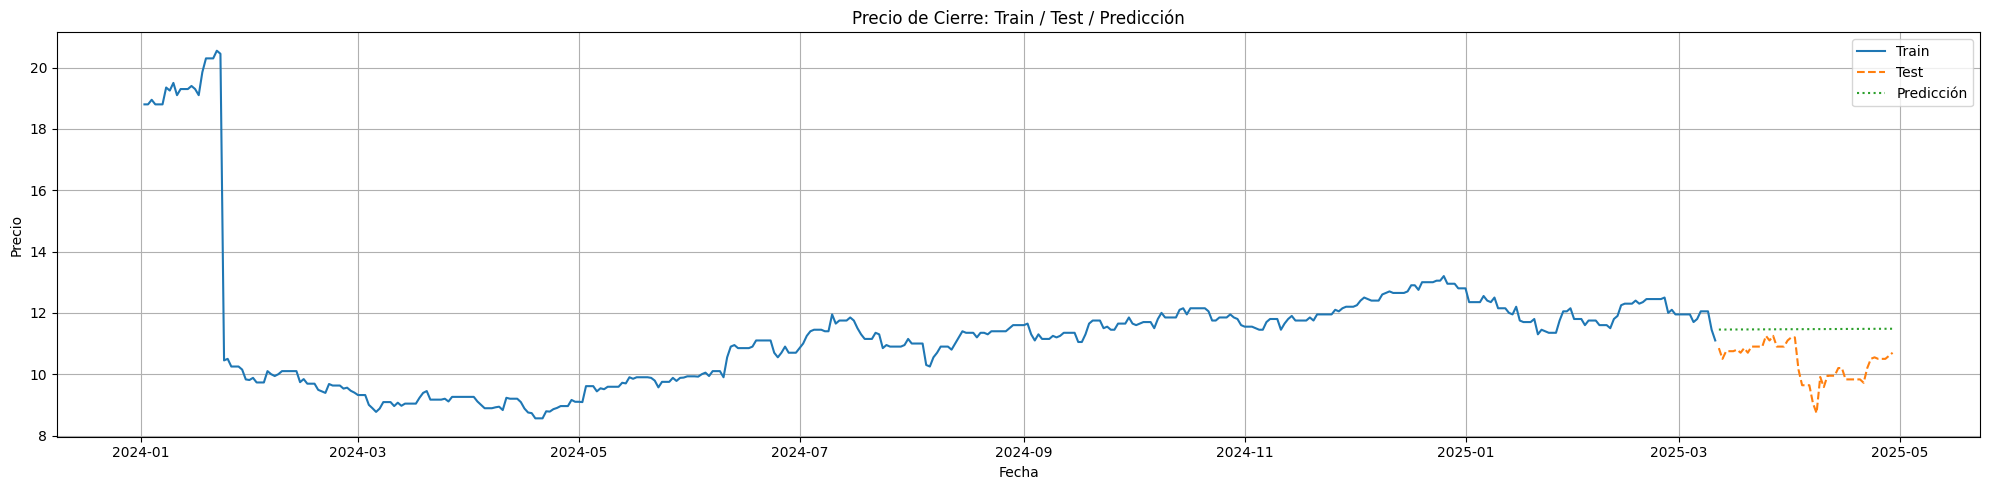

In [23]:
train_auto = train_auto.set_index('fecha')
test_auto = test_auto.set_index('fecha')
forecast = prediction_fast.forecast  # esto ya tiene fechas como índice

# Graficar
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 5))

# Entrenamiento
ax.plot(train_auto['precio_cierre'], label='Train')

# Test real
ax.plot(test_auto['precio_cierre'], label='Test', linestyle='--')

# Predicción
ax.plot(forecast, label='Predicción', linestyle='dotted')

# Detalles del gráfico
ax.set_title('Precio de Cierre: Train / Test / Predicción')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [24]:
regresores_2 = [
    'precio_apertura', 'volumen_operado',
    'suma_score_sentimiento_negativas',
    'suma_score_sentimiento_positivas'
]

In [30]:
train_auto[regresores_2].head()

,precio_apertura,volumen_operado,suma_score_sentimiento_negativas,suma_score_sentimiento_positivas
fecha,,,,
2024-01-02,18.9,66824.55,-4.6140,2.2226
2024-01-03,19.0,81325.30,-5.2430,5.8712
2024-01-04,18.8,97707.20,-4.7588,1.9421
2024-01-05,19.0,201923.66,-4.4207,3.5364
2024-01-06,19.0,201923.66,-4.4207,3.5364


In [28]:
model_fast_2 = AutoTS(
    forecast_length=len(test_auto),
    frequency='D',
    prediction_interval=0.9,
    ensemble=None,
    models_mode='deep',
    model_list = 'fast'  ,
    max_generations=10,   # intenta optimizar el modelo a traves de 10 iteraciones de ajuste.
    num_validations=3,
    no_negatives=True,
    n_jobs='auto'
)

Using 3 cpus for n_jobs.


In [ ]:
model_fast_2 = model_fast_2.fit(
    train_auto,
    date_col='fecha',
    value_col='precio_cierre',
    id_col=None,
    future_regressor=train_auto[regresores_2]
)

ValueError: Could not convert date to datetime format. Incorrect column name or preformat with pandas to_datetime

In [ ]:
prediction_fast_2 = model_fast_2.predict(future_regressor=test_auto[regresores_2])